# Визуализация данных

## Импортируем необходимые модули

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Настраиваем подключение к БД

In [12]:
user = "entries_user"
password = "entries_password"
host = "localhost"
port = "5432"
database = "entries_db"

engine = create_engine(f"postgresql://{user}:{password}@{host}:{port}/{database}")

## Распределение опозданий по категориям

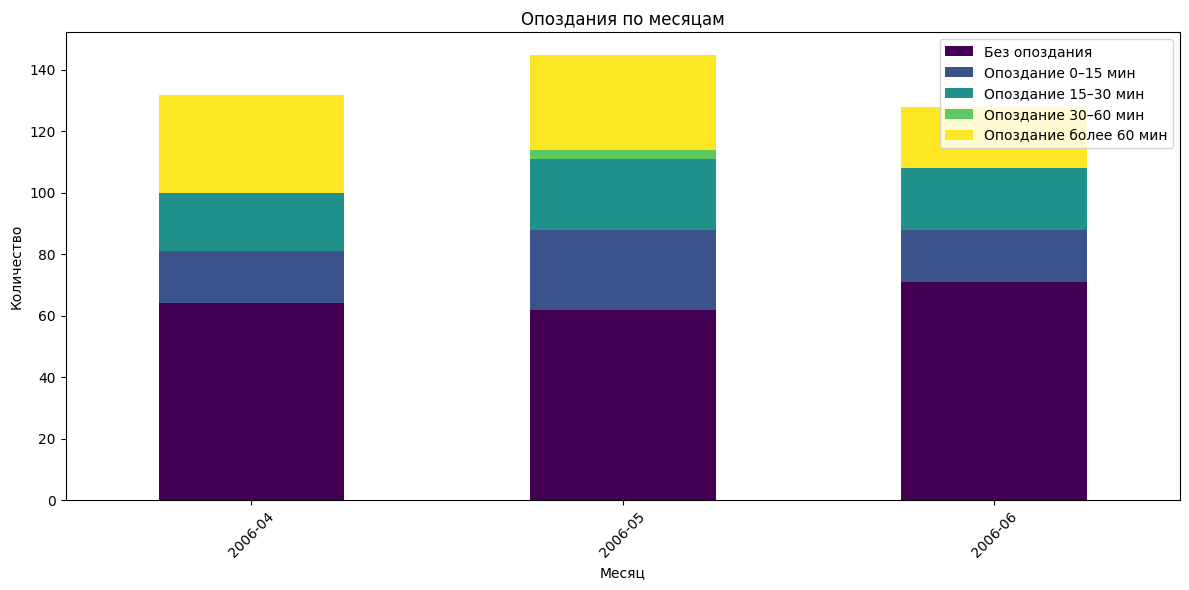

In [13]:
df = pd.read_sql("SELECT * FROM aggregated_info_tgt", engine)

df_grouped = df.groupby("month")[
    ["on_time_count", "late_0_15", "late_15_30", "late_30_60", "late_60_plus"]
].sum()

df_grouped = df_grouped.rename(columns={
    "on_time_count": "Без опоздания",
    "late_0_15": "Опоздание 0–15 мин",
    "late_15_30": "Опоздание 15–30 мин",
    "late_30_60": "Опоздание 30–60 мин",
    "late_60_plus": "Опоздание более 60 мин"
})

df_grouped.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.title("Опоздания по месяцам")
plt.ylabel("Количество")
plt.xlabel("Месяц")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Средняя продолжительность рабочего дня в каждый месяц

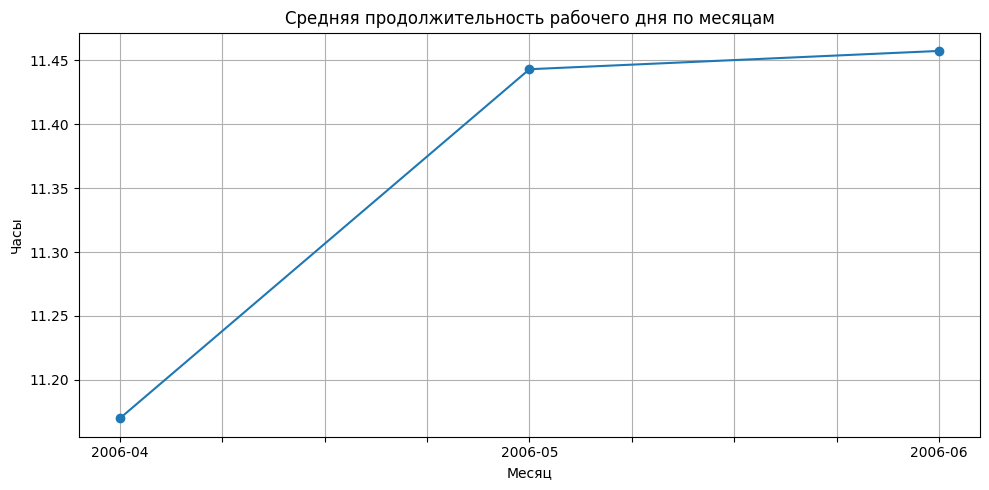

In [14]:
df_grouped = df.groupby("month")["avg_worktime"].mean()

df_grouped.plot(kind="line", marker='o', figsize=(10,5))
plt.title("Средняя продолжительность рабочего дня по месяцам")
plt.ylabel("Часы")
plt.xlabel("Месяц")
plt.grid(True)
plt.tight_layout()
plt.show()

## Количество неполных рабочих дней по департаментам

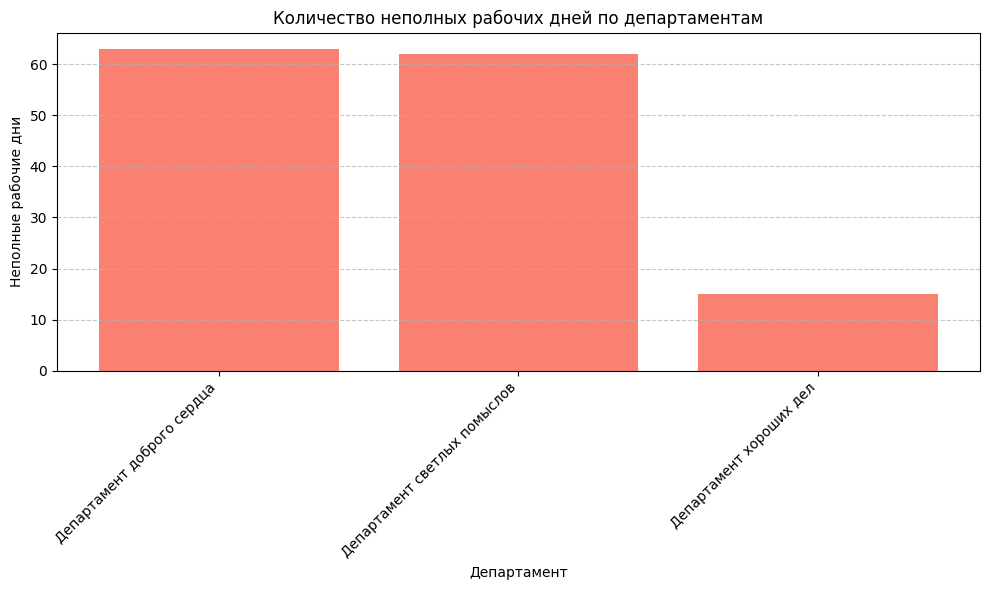

In [15]:
df = pd.read_sql("""
    SELECT 
        xref.department,
        SUM(a.short_day_count) AS total_short_days
    FROM aggregated_info_tgt a
    JOIN worker_department_xref xref
        ON a.full_name = xref.full_name
    GROUP BY xref.department
    ORDER BY total_short_days DESC
""", engine)

plt.figure(figsize=(10, 6))
plt.bar(df["department"], df["total_short_days"], color="salmon")
plt.title("Количество неполных рабочих дней по департаментам")
plt.xlabel("Департамент")
plt.ylabel("Неполные рабочие дни")
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()